In [2]:
import os

import matplotlib.pyplot as plt             
import numpy as np
import seaborn as sn;
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle           

import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [3]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    datasets = [r'C:\Users\Saransh Saxena\Downloads\archive (2)\seg_train\seg_train', 
                r'C:\Users\Saransh Saxena\Downloads\archive (2)\seg_test\seg_test']
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|                                                                                         | 0/2191 [00:00<?, ?it/s]

Loading C:\Users\Saransh Saxena\Downloads\archive (2)\seg_train\seg_train


  1%|▊                                                                                 | 4/437 [00:00<00:11, 38.55it/s]

Loading C:\Users\Saransh Saxena\Downloads\archive (2)\seg_test\seg_test


100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [00:08<00:00, 56.07it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=5)

In [7]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

print("Training Examples = {}".format(n_train))
print("Testing Examples = {}".format(n_test))
print("Image Size = {}".format(IMAGE_SIZE))

Training Examples = 14034
Testing Examples = 3000
Image Size = (150, 150)


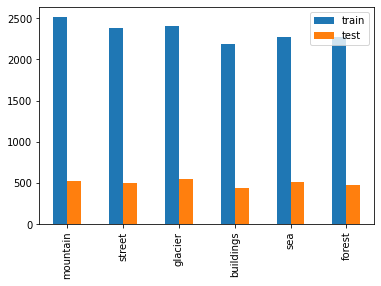

In [8]:
import pandas as pd
_,train_counts = np.unique(train_labels, return_counts=True)
_,test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train':train_counts, 'test':test_counts}, index=class_names).plot.bar()
plt.show()

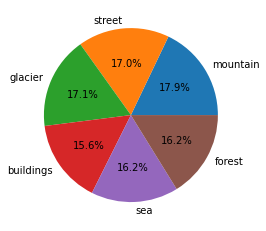

In [9]:
plt.pie(train_counts, labels=class_names, autopct='%1.1f%%')
plt.show()

In [10]:
#scaling the data,
train_images /= 255.0
test_images /= 255.0

In [11]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #{}".format(index+1)+" "+class_names[labels[index]])
    plt.show()

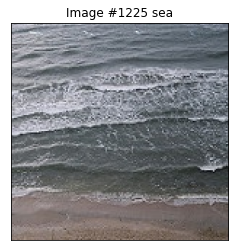

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples",fontsize=12)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(class_names[labels[i]])
    plt.show()

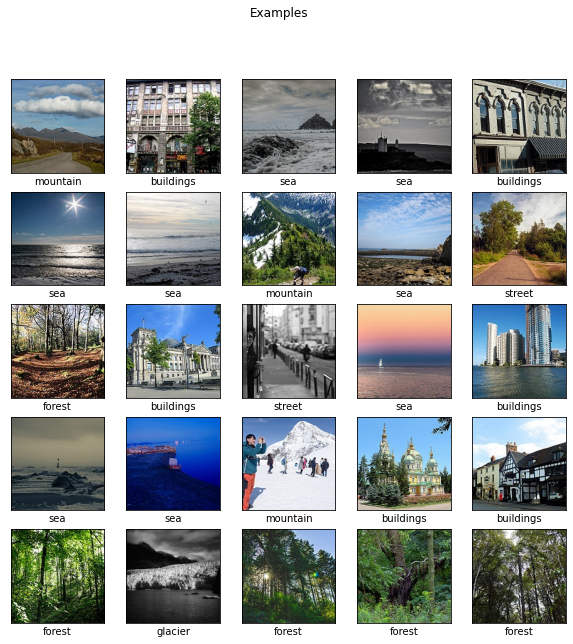

In [14]:
display_examples(class_names, train_images, train_labels)

In [15]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    MaxPooling2D(2,2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(6, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [43]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 180s 2s/step - loss: 0.6379 - accuracy: 0.7707 - val_loss: 0.7222 - val_accuracy: 0.7253
Epoch 2/10
88/88 [==============================] - 192s 2s/step - loss: 0.5135 - accuracy: 0.8209 - val_loss: 0.6739 - val_accuracy: 0.7649
Epoch 3/10
88/88 [==============================] - 192s 2s/step - loss: 0.4097 - accuracy: 0.8587 - val_loss: 0.7618 - val_accuracy: 0.7389
Epoch 4/10
88/88 [==============================] - 208s 2s/step - loss: 0.3168 - accuracy: 0.8953 - val_loss: 0.6955 - val_accuracy: 0.7677
Epoch 5/10
88/88 [==============================] - 190s 2s/step - loss: 0.2253 - accuracy: 0.9268 - val_loss: 0.7136 - val_accuracy: 0.7659
Epoch 6/10
88/88 [==============================] - 184s 2s/step - loss: 0.1580 - accuracy: 0.9540 - val_loss: 0.7492 - val_accuracy: 0.7727
Epoch 7/10
88/88 [==============================] - 187s 2s/step - loss: 0.1064 - accuracy: 0.9733 - val_loss: 0.8671 - val_accuracy: 0.7667
Epoch 8/10
88

In [28]:
def plot_accuracy_history(history):
    plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label='acc')
    plt.plot(history.history['val_accuracy'],'r*--', label='val_acc')
    plt.title("Train vs Val Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()    

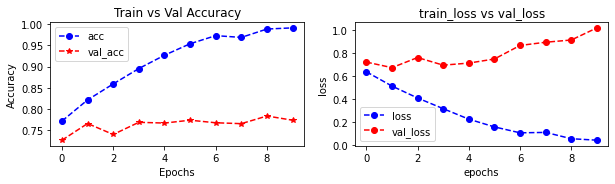

In [54]:
plot_accuracy_history(history)

In [55]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 13s 141ms/step - loss: 1.0243 - accuracy: 0.7657


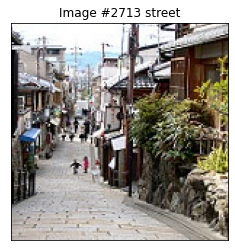

In [56]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
display_random_image(class_names, test_images, pred_labels)

In [19]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels==pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    
    display_examples(class_names, mislabeled_images, mislabeled_labels)

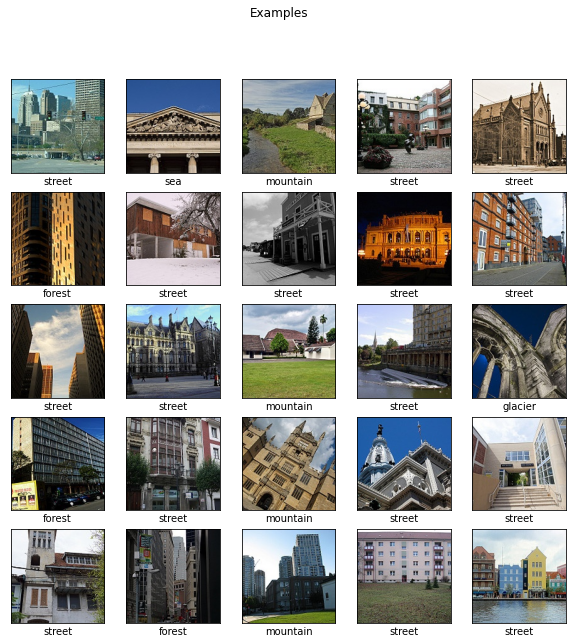

In [58]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

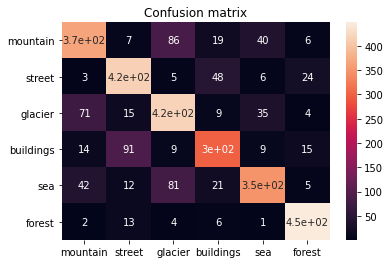

In [59]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

### VGG 16

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

model = VGG16(weights='imagenet', include_top=False)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [21]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [22]:
#Visualize using PCA

n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
num_features = x*y*z

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = train_features.reshape((n_train, x*y*z))
pca.fit(X)
C = pca.transform(X)

C1 = C[:,0]
C2 = C[:,1]

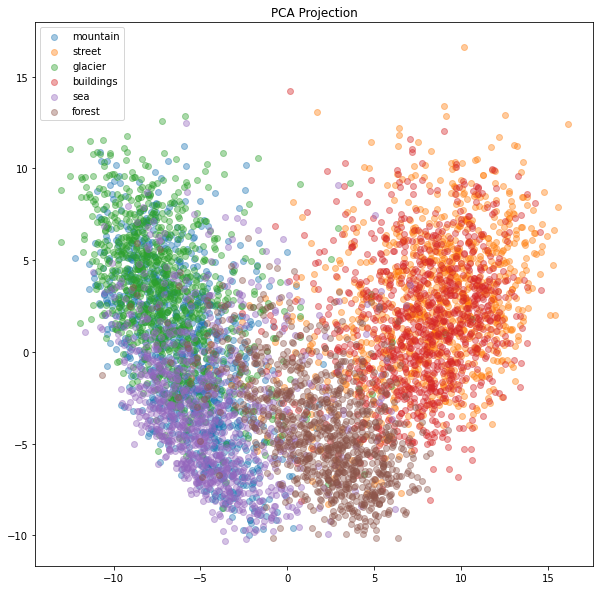

In [23]:
plt.subplots(figsize=(10,10))

for i, class_names in enumerate(class_names):
    plt.scatter(C1[train_labels==i][:1000], C2[train_labels==i][:1000], label=class_names, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [26]:
#Training on top of frozen VGG16 Layer
model2 = tf.keras.Sequential([
    Flatten(input_shape=(x,y,z)),
    Dense(50, activation=tf.nn.relu),
    Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128,
                     epochs=20, validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 1s 7ms/step - loss: 0.5874 - accuracy: 0.7895 - val_loss: 0.3772 - val_accuracy: 0.8653
Epoch 2/20
88/88 [==============================] - 1s 6ms/step - loss: 0.3072 - accuracy: 0.8916 - val_loss: 0.3383 - val_accuracy: 0.8760
Epoch 3/20
88/88 [==============================] - 1s 6ms/step - loss: 0.2550 - accuracy: 0.9089 - val_loss: 0.3573 - val_accuracy: 0.8607
Epoch 4/20
88/88 [==============================] - 1s 6ms/step - loss: 0.2045 - accuracy: 0.9300 - val_loss: 0.3328 - val_accuracy: 0.8853
Epoch 5/20
88/88 [==============================] - 1s 7ms/step - loss: 0.1768 - accuracy: 0.9393 - val_loss: 0.3426 - val_accuracy: 0.8785
Epoch 6/20
88/88 [==============================] - 1s 9ms/step - loss: 0.1594 - accuracy: 0.9448 - val_loss: 0.3518 - val_accuracy: 0.8785
Epoch 7/20
88/88 [==============================] - 1s 6ms/step - loss: 0.1271 - accuracy: 0.9602 - val_loss: 0.3519 - val_accuracy: 0.8785
Epoch 8/20
88/88 [==

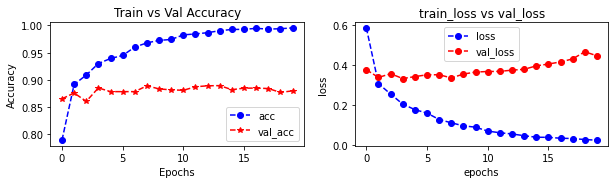

In [29]:
plot_accuracy_history(history2)

In [30]:
test_loss = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8723


### Ensemble Neural Networks

In [31]:
n_estimators=10
max_samples=0.8
max_samples = max_samples*n_train
max_samples = int(max_samples)

In [32]:
models = list()
random = np.random.randint(50,100,size=n_estimators)

for i in range(n_estimators):
    model = tf.keras.Sequential([
        Flatten(input_shape=(x,y,z)),
        Dense(random[i], activation=tf.nn.relu),
        Dense(6, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    models.append(model)

In [33]:
histories = []
for i in range(n_estimators):
    train_idx = np.random.choice(len(train_features), size=max_samples)
    histories.append(models[i].fit(train_features[train_idx],
                                  train_labels[train_idx], batch_size=128,
                                  epochs=10, validation_split=0.1))

Epoch 1/10
79/79 [==============================] - 1s 7ms/step - loss: 0.5148 - accuracy: 0.8127 - val_loss: 0.3212 - val_accuracy: 0.8878
Epoch 2/10
79/79 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.9100 - val_loss: 0.2838 - val_accuracy: 0.8976
Epoch 3/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1910 - accuracy: 0.9379 - val_loss: 0.2779 - val_accuracy: 0.9065
Epoch 4/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1427 - accuracy: 0.9574 - val_loss: 0.2383 - val_accuracy: 0.9252
Epoch 5/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 0.9673 - val_loss: 0.2363 - val_accuracy: 0.9288
Epoch 6/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0943 - accuracy: 0.9726 - val_loss: 0.2160 - val_accuracy: 0.9430
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0748 - accuracy: 0.9814 - val_loss: 0.2267 - val_accuracy: 0.9412
Epoch 8/10
79/79 [==

In [34]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))

predictions = np.array(predictions)
predictions = predictions.sum(axis=0)
pred_labels = predictions.argmax(axis=1)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy {}".format((accuracy_score(test_labels,pred_labels,3))))

Accuracy 0.8856666666666667


### Fine Tuning VGG

In [45]:
from tensorflow.keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [46]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [49]:
model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = tf.keras.layers.Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [50]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

In [52]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 391s 4s/step - loss: 0.7595 - accuracy: 0.7027 - val_loss: 0.4154 - val_accuracy: 0.8514
Epoch 2/10
88/88 [==============================] - 375s 4s/step - loss: 0.3327 - accuracy: 0.8831 - val_loss: 0.3459 - val_accuracy: 0.8807
Epoch 3/10
88/88 [==============================] - 366s 4s/step - loss: 0.2747 - accuracy: 0.9037 - val_loss: 0.2920 - val_accuracy: 0.8938
Epoch 4/10
88/88 [==============================] - 354s 4s/step - loss: 0.2119 - accuracy: 0.9244 - val_loss: 0.3179 - val_accuracy: 0.8853
Epoch 5/10
88/88 [==============================] - 382s 4s/step - loss: 0.1783 - accuracy: 0.9383 - val_loss: 0.2821 - val_accuracy: 0.9045
Epoch 6/10
88/88 [==============================] - 389s 4s/step - loss: 0.1541 - accuracy: 0.9475 - val_loss: 0.3508 - val_accuracy: 0.8881
Epoch 7/10
88/88 [==============================] - 374s 4s/step - loss: 0.1439 - accuracy: 0.9491 - val_loss: 0.4252 - val_accuracy: 0.8668
Epoch 8/10
88

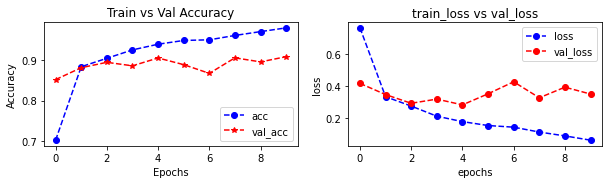

Accuracy : 0.9013333333333333


In [54]:
plot_accuracy_history(history)

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))